<a href="https://colab.research.google.com/github/arvshaphd7/BigCats-Classifier/blob/main/Snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.4 MB/s 
     |████████████████████████████████| 4.9 MB 35.0 MB/s 
     |████████████████████████████████| 1.3 MB 41.5 MB/s 
     |████████████████████████████████| 431 kB 34.2 MB/s 
     |████████████████████████████████| 115 kB 53.9 MB/s 
     |████████████████████████████████| 212 kB 37.2 MB/s 
     |████████████████████████████████| 120 kB 44.6 MB/s 
     |████████████████████████████████| 127 kB 42.4 MB/s 
     |████████████████████████████████| 6.6 MB 34.9 MB/s 
Mounted at /content/gdrive


In [9]:
#hide
from fastbook import *

In [7]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [11]:
# code to download all the url's of each of the search terms, and then put them in sepearate folders
Snakes_types = 'poisonous Snake','non poisonous snakes'
path = Path('Snakes')
if not path.exists():
    path.mkdir(exist_ok = True)
    ind = 0
    for o in Snakes_types:
      dest = (path/o)
      dest.mkdir(exist_ok=True)
      results = search_images_ddg(f'{o} Snakes', max_images=300)
      for i in results:
        ind +=1
        dest = f"Snakes/{o}/{o}{ind}.jpg"
        try:
          path1, dirs, files = next(os.walk(f"/content/Snakes/{o}"))
          if len(files) < 100:
            download_url(i, dest)
          else:
            break
        except:
          continue

In [12]:
# image paths in the folder
fns = get_image_files(path)
fns

(#200) [Path('Snakes/poisonous Snake/poisonous Snake32.jpg'),Path('Snakes/poisonous Snake/poisonous Snake78.jpg'),Path('Snakes/poisonous Snake/poisonous Snake15.jpg'),Path('Snakes/poisonous Snake/poisonous Snake86.jpg'),Path('Snakes/poisonous Snake/poisonous Snake23.jpg'),Path('Snakes/poisonous Snake/poisonous Snake99.jpg'),Path('Snakes/poisonous Snake/poisonous Snake17.jpg'),Path('Snakes/poisonous Snake/poisonous Snake90.jpg'),Path('Snakes/poisonous Snake/poisonous Snake80.jpg'),Path('Snakes/poisonous Snake/poisonous Snake26.jpg')...]

In [13]:
# corrupt downloaded files
failed = verify_images(fns)
failed

(#1) [Path('Snakes/poisonous Snake/poisonous Snake84.jpg')]

In [14]:
#code to unlink all the failed images
failed.map(Path.unlink);

In [30]:
# stores the object and make them available as train and valid 
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])

In [31]:
Snakes = DataBlock(
  blocks=(ImageBlock, CategoryBlock), # independent variable = from which we make predictions (i.e. set of images), Dependent variable : differnet catagories (i.e. type of bigCat)
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
  get_y=parent_label,
  item_tfms=Resize(128))

In [32]:
dls = Snakes.dataloaders(path)

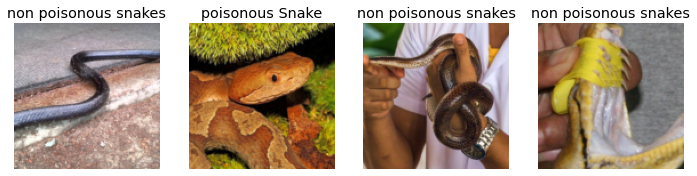

In [33]:
dls.valid.show_batch(max_n=4, nrows=1)

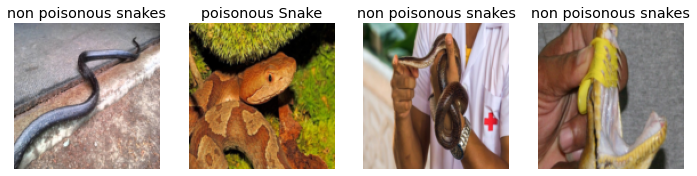

In [34]:
Snakes = Snakes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

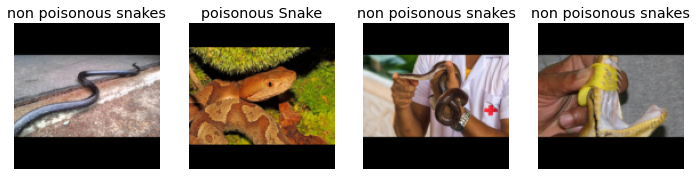

In [35]:
Snakes = Snakes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = Snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

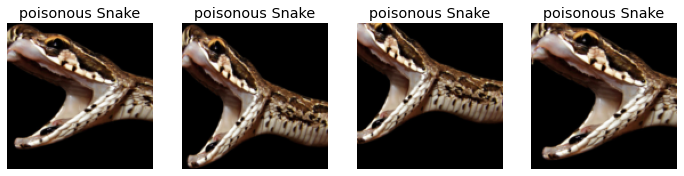

In [36]:
Snakes =Snakes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls =Snakes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

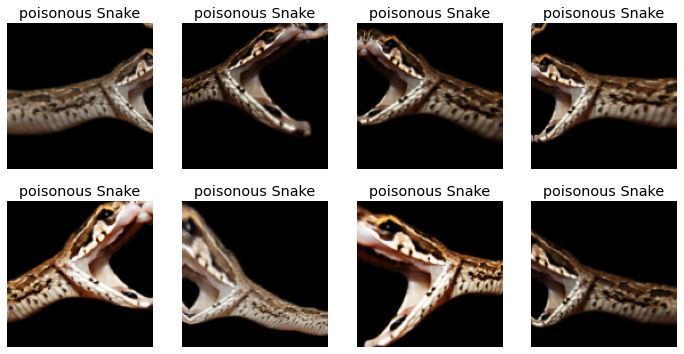

In [37]:
Snakes = Snakes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = Snakes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [38]:
Snakes = Snakes.new(
  item_tfms=RandomResizedCrop(224, min_scale=0.5),
  batch_tfms=aug_transforms())
dls = Snakes.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.148532,1.497552,0.589744,00:31


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
from fastai.vision.widgets import *

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/leopard.jpg')

In [ ]:
dest = 'images/leopard.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
learn_inf.dls.vocab


In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your bear!'),
  btn_upload, btn_run, out_pl, lbl_pred])